# One shot and Few shot prompting

<a target="_blank" href="https://colab.research.google.com/github/juanhuguet/intro_to_llms/blob/main/intro_to_llms/02_few_shot_prompting.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
%pip install --upgrade vllm -q

In [1]:
%pip install langchain langchain_community -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.7/116.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 6.4 MB/s eta 0:00:00


## Zero-Shot Learning

Zero-shot learning (ZSL) does not require any specific examples of the task at hand. The model uses its pre-existing knowledge to infer answers or make decisions about completely new tasks.

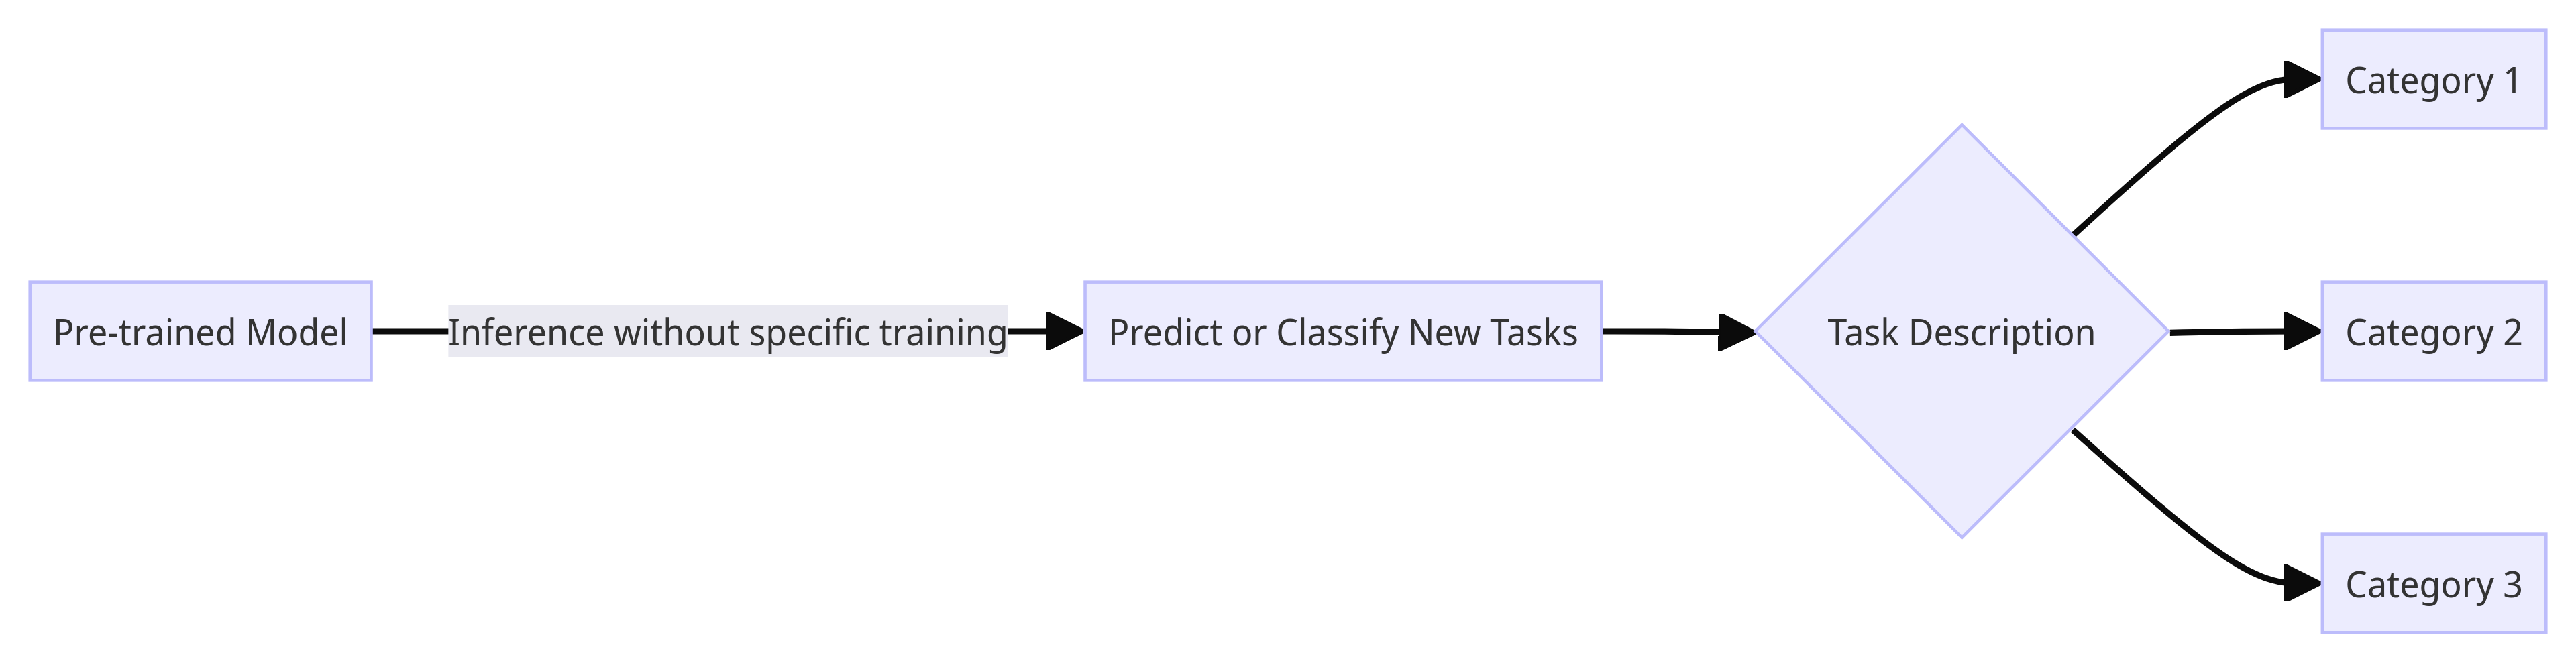


In [3]:
from langchain_core.prompts import PromptTemplate

In [4]:
from langchain_community.llms import VLLM

llm = VLLM(
    model="TheBloke/Mistral-7B-Instruct-v0.2-AWQ",
    trust_remote_code=True,  # mandatory for hf models
    max_new_tokens=1000,
    top_p=0.95,
    stop=["\n\n"],
    temperature=0.3,
    vllm_kwargs={"quantization": "awq",
                 "max_model_len": 10000},
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

WARNING 05-06 15:18:15 config.py:205] awq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
INFO 05-06 15:18:15 llm_engine.py:100] Initializing an LLM engine (v0.4.2) with config: model='TheBloke/Mistral-7B-Instruct-v0.2-AWQ', speculative_config=None, tokenizer='TheBloke/Mistral-7B-Instruct-v0.2-AWQ', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.float16, max_seq_len=10000, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, disable_custom_all_reduce=False, quantization=awq, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), seed=0, served_model_name=TheBloke/Mistral-7B-Instruct-v0.2-AWQ)


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

INFO 05-06 15:18:16 utils.py:660] Found nccl from library /root/.config/vllm/nccl/cu12/libnccl.so.2.18.1
INFO 05-06 15:18:18 selector.py:69] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 05-06 15:18:18 selector.py:32] Using XFormers backend.
INFO 05-06 15:18:20 weight_utils.py:199] Using model weights format ['*.safetensors']


model.safetensors:   0%|          | 0.00/4.15G [00:00<?, ?B/s]

INFO 05-06 15:19:07 model_runner.py:175] Loading model weights took 3.8814 GB
INFO 05-06 15:19:13 gpu_executor.py:114] # GPU blocks: 3534, # CPU blocks: 2048
INFO 05-06 15:19:16 model_runner.py:937] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 05-06 15:19:16 model_runner.py:941] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 05-06 15:19:32 model_runner.py:1017] Graph capturing finished in 17 secs.


In [5]:
introduction_context = ("Given a text, i want you to classify its tone based in its content."
                        "Classify it into positive or negative. Answer in the following format and do not give further exlpanatios: tone: your answer.\n"
                        )

clear_instruction = "Please classify the following text: {text_to_classify}.\n"

In [6]:
template = introduction_context + clear_instruction

In [7]:
prompt_template = PromptTemplate(
    input_variables=["text_to_classify"],
    template=template
)

In [8]:
classification_chain = prompt_template | llm

In [9]:
classification_chain.invoke("The food was cold and the waiter was very rude")

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


'tone: negative.'

# One and few shot learning

## One-Shot Learning
One-shot learning involves the model learning or adapting from a single example. This is often used to quickly adapt a model to new tasks, based on a very limited set of data, typically just one instance.

## Few-Shot Learning
Few-shot learning enhances the model's ability by using a few examples to guide predictions or classifications. It's somewhere between one-shot learning and traditional machine learning models that require large datasets.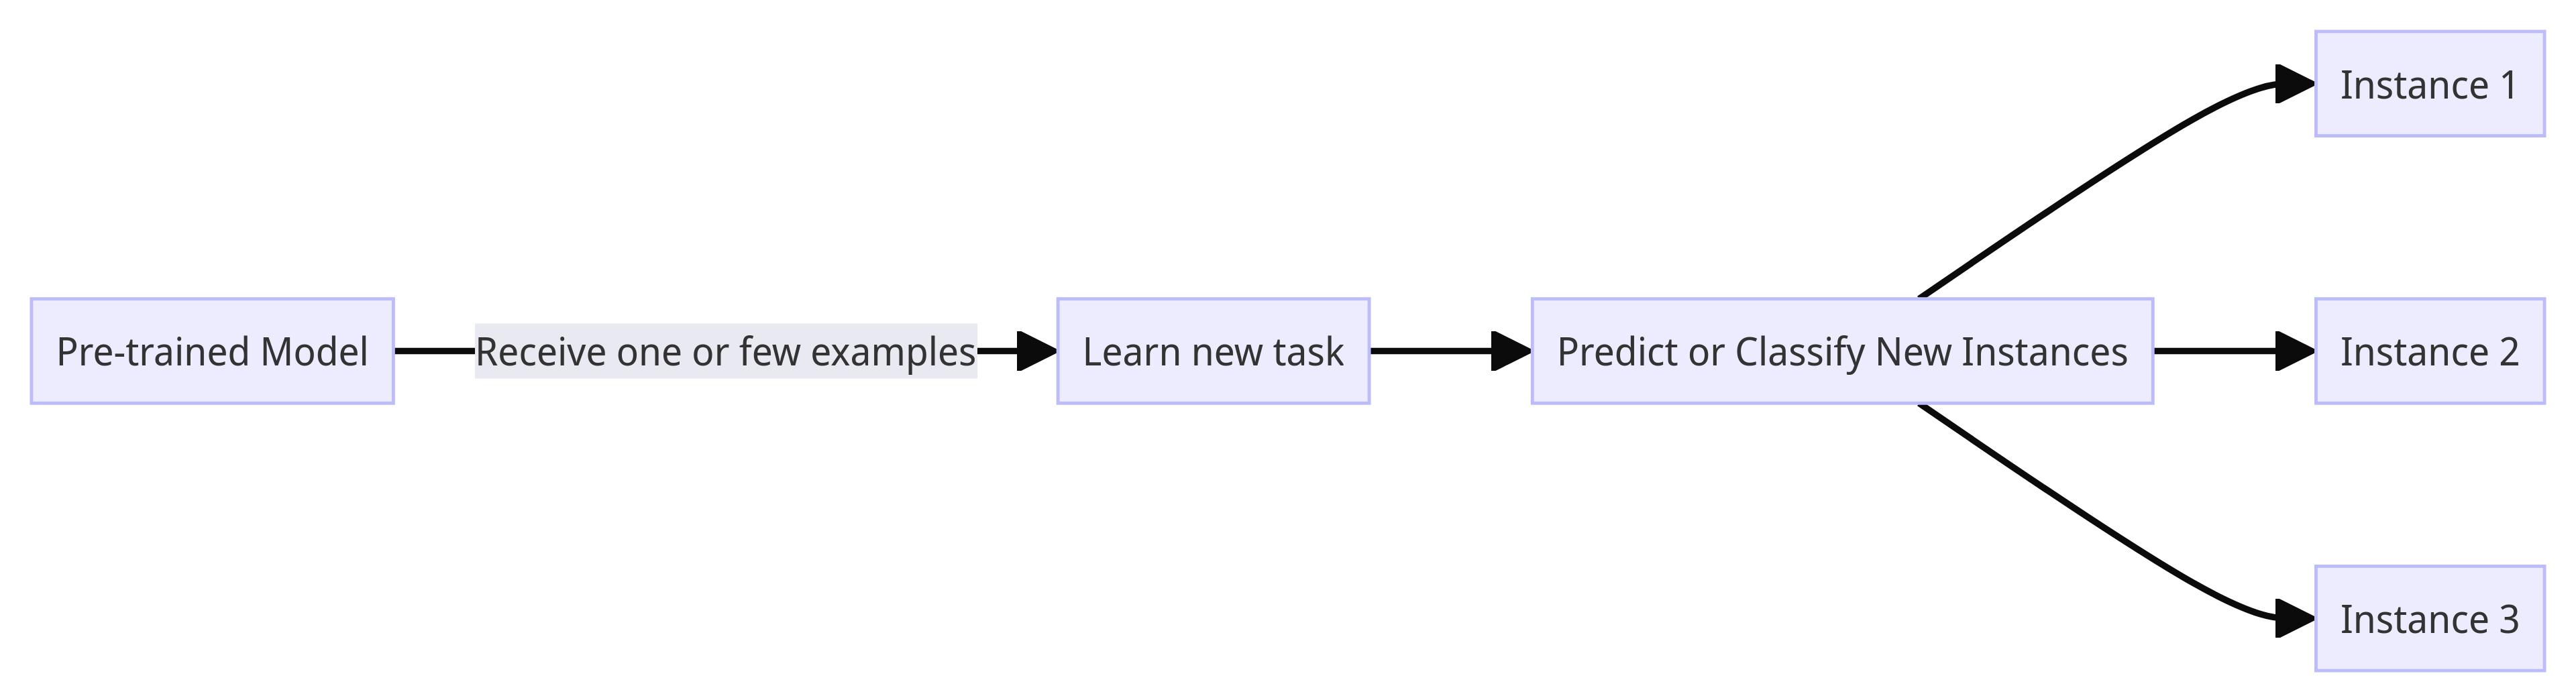

In [10]:
from langchain import FewShotPromptTemplate

examples = [
    {
        "text_to_classify": "Driver hit a deer while driving on a rural road at night. Significant damage to the vehicle's front end.",
        "type": "collision"
    }, {
        "text_to_classify": "Car was stolen from a shopping mall parking lot and was recovered three days later with interior damage.",
        "type": "theft"
    }
]

example_template = """
Input: {text_to_classify}
Output: {type}
"""

In [11]:
example_prompt = PromptTemplate(
    input_variables=["text_to_classify", "type"],
    template=example_template
)

In [14]:
print(example_prompt)

input_variables=['text_to_classify', 'type'] template='\nInput: {text_to_classify}\nOutput: {type}\n'


In [15]:

prefix = """The following are exerpts from insurance claims. Classify them into the following categories: collision, theft, vandalism
"""

suffix = """
Input: {text_to_classify}
Output: """

few_shot_prompt_template = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["text_to_classify"],
    example_separator="\n\n"
)

In [16]:
text = "Driver side-swiped another car when changing lanes on the highway. Moderate damage to the side mirror."

print(few_shot_prompt_template.invoke(text).text)

The following are exerpts from insurance claims. Classify them into the following categories: collision, theft, vandalism



Input: Driver hit a deer while driving on a rural road at night. Significant damage to the vehicle's front end.
Output: collision



Input: Car was stolen from a shopping mall parking lot and was recovered three days later with interior damage.
Output: theft



Input: Driver side-swiped another car when changing lanes on the highway. Moderate damage to the side mirror.
Output: 


In [17]:
few_shot_classification = few_shot_prompt_template | llm.bind(stop=["\n\n"])

In [18]:
few_shot_classification.invoke(text)

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


' collision'

# Multiple examples

We can run now this pipeline in a batch process to obtain the desired category

In [22]:
insurance_claims = [
  "During a thunderstorm, a large tree branch fell and smashed the hood of the car.",
  "The rear window of the car was shattered when parked outside the owner's home overnight.",
  "A vehicle slid on an icy road and collided with a street lamp.",
  "The car's sound system was stolen after someone forced open the trunk while it was parked overnight in a residential area.",
  "The side mirror was deliberately broken off while the car was parked at a subway station.",
  "While trying to avoid hitting a dog, the driver swerved and hit a fence.",
  "The car was scratched with a key along the driver’s side while parked at a local high school during a sports event.",
  "The car was involved in a hit-and-run incident in a grocery store parking lot, causing a dent in the passenger door.",
  "Personal items were stolen from the car while the windows were left slightly open in a public park.",
  "Graffiti was spray-painted on the car's exterior while it was parked in an underground parking garage."
  ]

In [27]:
classes = few_shot_classification.batch(insurance_claims)

Processed prompts: 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]


In [28]:
classes

[' collision (with a tree)',
 ' vandalism',
 ' collision',
 ' theft',
 ' vandalism',
 ' collision',
 ' vandalism',
 ' collision',
 ' theft',
 ' vandalism']

# Conclusions

* We have seen Zero and Few shot learning paradigms
* We have seen how to set up a llm to handle text classification problems